In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans_mutation_df = pd.read_csv('data/transmutation_df.csv')
delta_correlation_df = pd.read_csv('data/delta_correlation_df.csv')

In [3]:
delta_correlation_df = delta_correlation_df[delta_correlation_df.FDR < 0.05]
delta_correlation_df = delta_correlation_df[['Gene', 'Cancer', 'Delta_Correlation']]
trans_mutation_df = trans_mutation_df.drop(columns = 'Delta_Correlation')
trans_df = pd.merge(trans_mutation_df, delta_correlation_df, how = 'inner')
trans_df

,Gene,P_Value,FDR,Cancer,Mutated_Gene,Delta_Correlation
0,A1CF,0.016782,0.724584,CCRCC,PBRM1,0.146993
1,A1CF,0.754865,0.973504,CCRCC,SETD2,0.146993
2,AAGAB,0.077515,0.874027,CCRCC,PBRM1,0.462502
3,AAGAB,0.672998,0.961758,CCRCC,SETD2,0.462502
4,AAK1,0.178295,0.912036,CCRCC,PBRM1,0.308750
...,...,...,...,...,...,...
180675,ZNF185,0.373601,0.949201,PDAC,TP53,0.792651
180676,ZNF24,0.240231,0.927282,PDAC,SMAD4,0.658897
180677,ZNF24,0.694942,0.977970,PDAC,TP53,0.658897
180678,DSG3,0.422421,0.953853,PDAC,TP53,0.637318


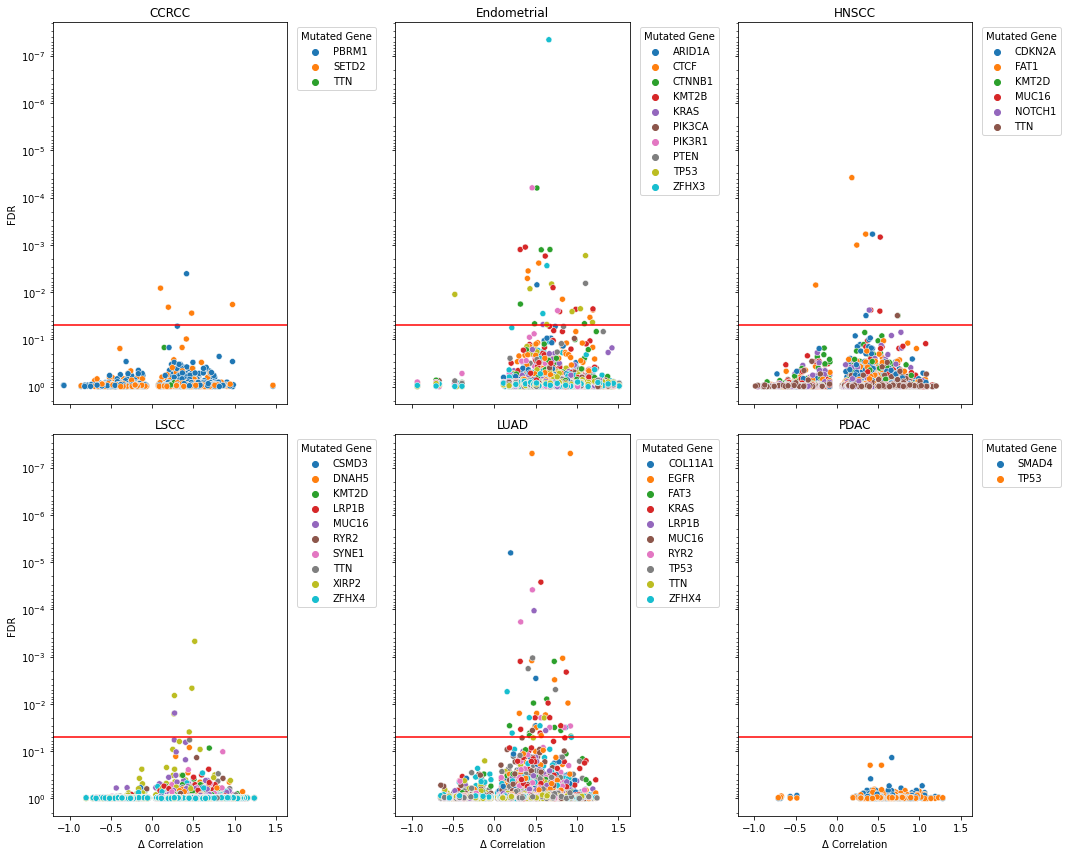

In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = True, sharey = True,
                        figsize=(15,12))
cancers = list(pd.unique(trans_df.Cancer))
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    plt.subplot(ax)
    sns.scatterplot(data = df, x = 'Delta_Correlation', y= 'FDR', hue = 'Mutated_Gene')
    plt.axhline(y = 0.05, color = 'r')
    plt.title(cancer)
    plt.legend(bbox_to_anchor=(1.4, 1), title = 'Mutated Gene')
    ax.set_xlabel(r'$\Delta$' +  ' Correlation')
ax.invert_yaxis()
ax.set_yscale('log')
fig.tight_layout()
plt.savefig('Figures/Figure 4) Transmutation Effects.png')
plt.show()
